In [9]:
import pandas as pd
from stack_data import markers_from_ranges

In [10]:
# CSV Befehl um csv als pandas einzulesen
df = pd.read_csv("survey_results_public.csv")
df.set_index("ResponseId", inplace=True)
df

,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Technical ...,...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Videos (no...,...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",Technical documentation (is generated for/by t...,...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49119,I am a developer by profession,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,NaN,9.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools req...",AI CodeGen tools or AI-enabled apps;Technical ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
49120,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Caring for dependents (children, elderly, etc.)",13.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools req...",AI CodeGen tools or AI-enabled apps;Videos (no...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49121,I am a developer by profession,25-34 years old,"Secondary school (e.g. American high school, G...",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Befehl um alle "SO"-Spalten zu droppen

Warum haben wir das gedroppt?
-> Nur Bezug auf Stackoverflow Sachen, ist nicht Relevant für uns.

In [11]:
df = df.drop(columns=df.columns[df.columns.str.startswith('SO')])

df

,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Technical ...,...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Videos (no...,...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",Technical documentation (is generated for/by t...,...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49119,I am a developer by profession,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,NaN,9.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools req...",AI CodeGen tools or AI-enabled apps;Technical ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
49120,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Caring for dependents (children, elderly, etc.)",13.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools req...",AI CodeGen tools or AI-enabled apps;Videos (no...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49121,I am a developer by profession,25-34 years old,"Secondary school (e.g. American high school, G...",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv("project/survey_results_public_without_SO.csv", index=False)

In [13]:
df = pd.read_csv("survey_results_public_without_SO.csv")


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_categorical_column(df, column):
    fig, ax = plt.subplots(figsize=(10,6))
    df[column].value_counts(dropna=False).plot(kind="bar", ax=ax)

    ax.set_xlabel(column)
    ax.set_ylabel('Anzahl')
    ax.set_title(f"Verteilung der Werte in '{column}'")
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### _What industry do you work for in?_

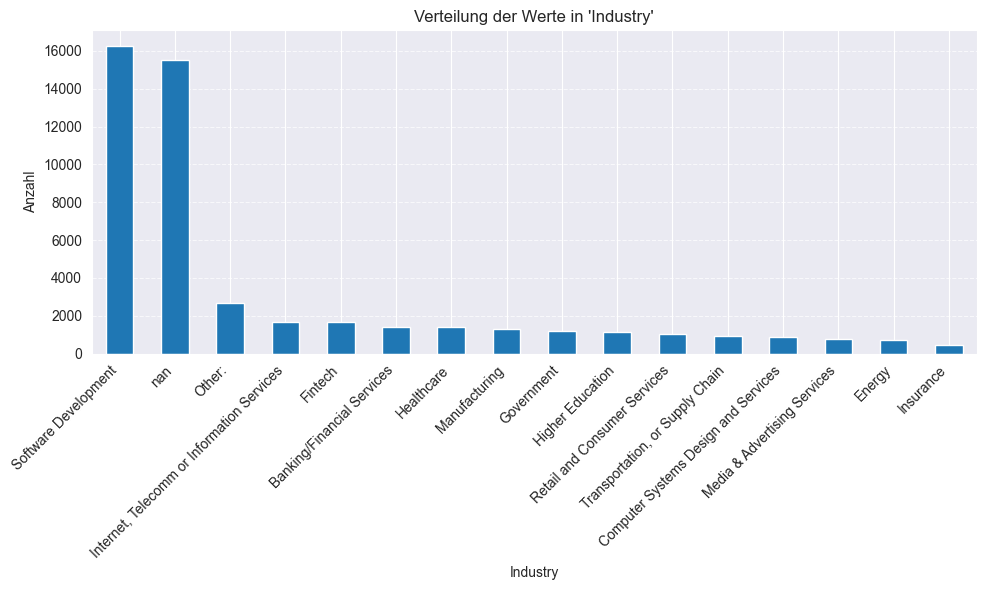

In [16]:
plot_categorical_column(df, "Industry")

#### _Do you believe AI is a threat to your current job?_


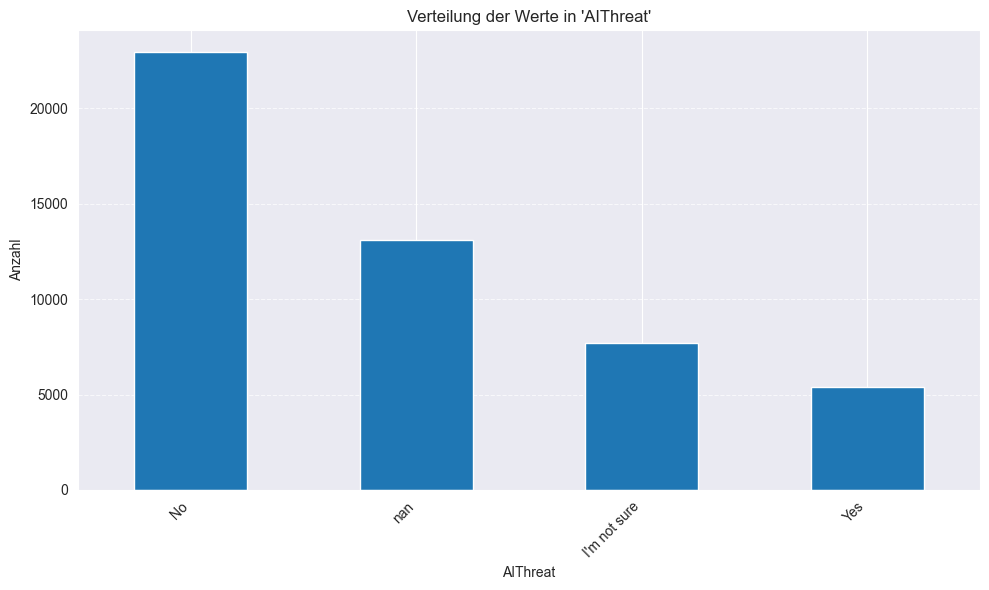

In [17]:
plot_categorical_column(df, "AIThreat")

#### _Have you considered a career change or transitioned into a new role in the past year?_

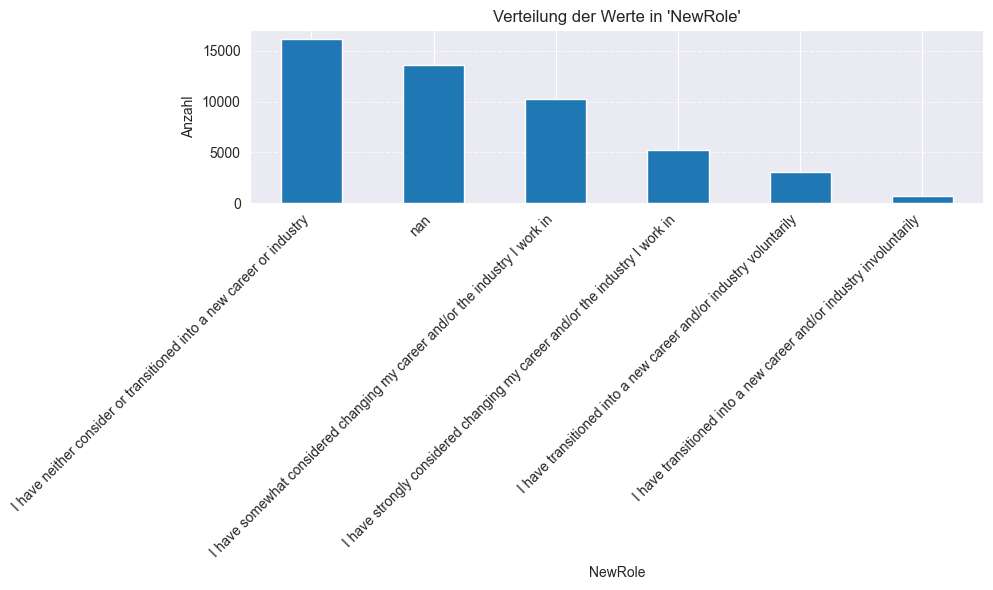

In [18]:
plot_categorical_column(df, "NewRole")

#### _For your primary work role (student, developer, or technologist) over the past year: Excluding general operating systems (like Windows or macOS) and web browsers, how many distinct software applications or platforms did you regularly use to create, analyze, manage, or share information in order to do your job? Please enter a whole number below with no punctuation, or leave blank._

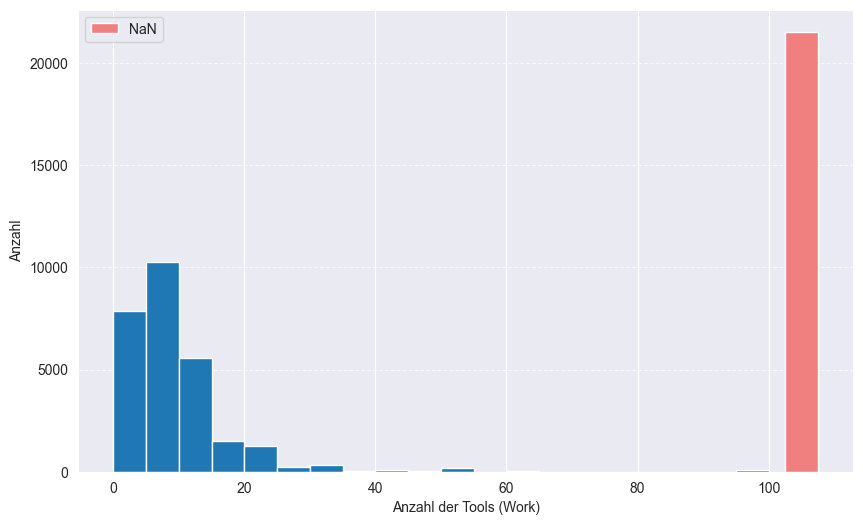

In [19]:
data = df['ToolCountWork'].dropna()

nan_count = df['ToolCountWork'].isna().sum()

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Anzahl der Tools (Work)')
ax.set_ylabel('Anzahl')

if nan_count > 0:
    ax.bar(105, nan_count, width=5, color='lightcoral', label='NaN')
    ax.legend()

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.hist(data, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.show()

Hab hier alle nach 100 nicht mehr betrachtet, da des irgendwann nichtmehr realitätsnah ist und das Histogramm dann nicht gut aussah. Kann man drüber sprechen ob man es doch anders machen sollte

#### _For your side projects or other personal work over the past year (focus on the project you spent the most time on if applicable): Excluding general operating systems and web browsers,how many distinct software applications or platforms did you regularly use to do your job? Please enter a whole number below with no punctuation, or leave blank._

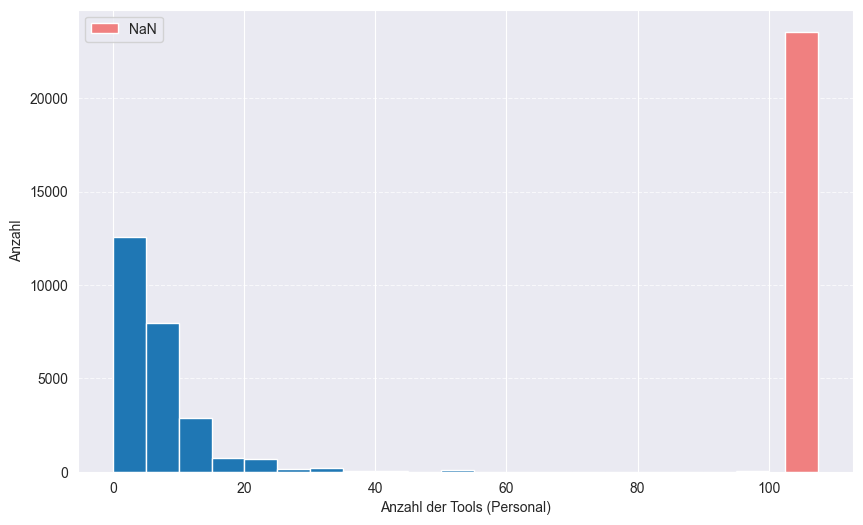

In [20]:
data = df['ToolCountPersonal'].dropna()

nan_count = df['ToolCountPersonal'].isna().sum()

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Anzahl der Tools (Personal)')
ax.set_ylabel('Anzahl')

if nan_count > 0:
    ax.bar(105, nan_count, width=5, color='lightcoral', label='NaN')
    ax.legend()

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.hist(data, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.show()

#### _Did you work with programming, scripting and markup languages in the last year or do you plan to in the year to come? Here, we are referring to anything you use that is conventionally referred to as code._

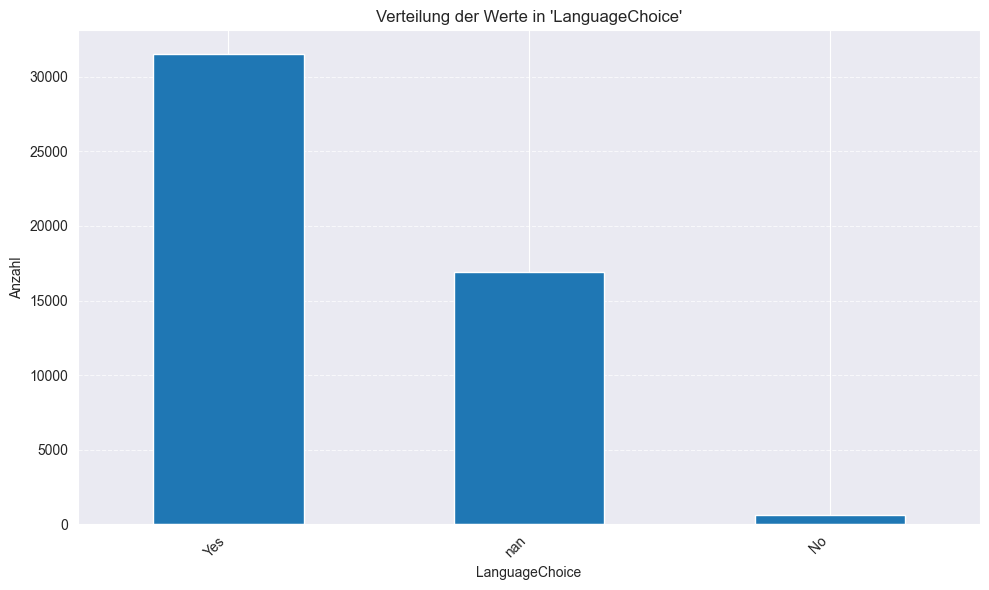

In [21]:
plot_categorical_column(df, "LanguageChoice")

#### _Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)_

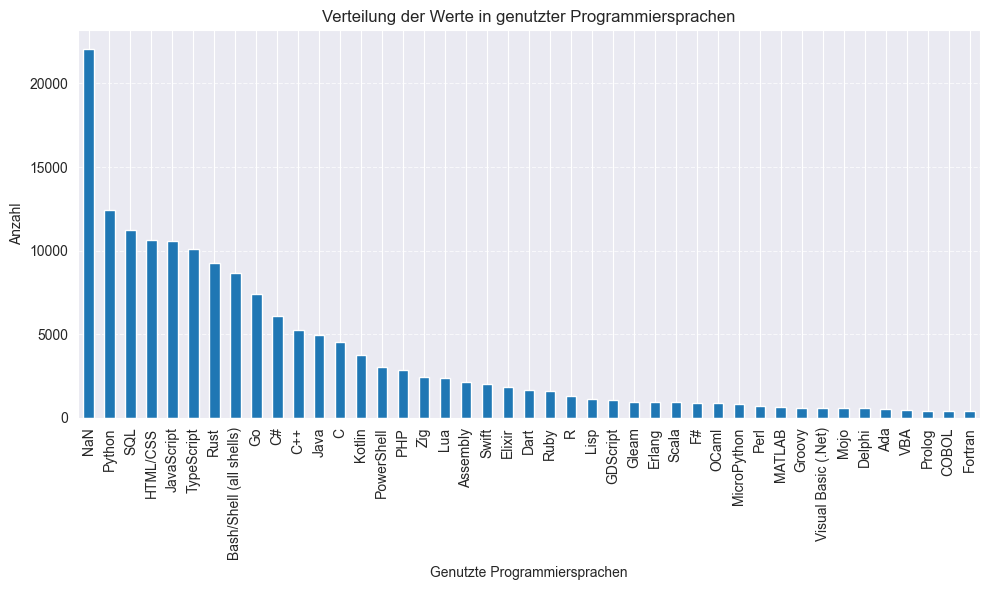

In [22]:
df_lang = df["LanguageWantToWorkWith"].fillna("NaN").str.split(";")

df_lang_exploded = df_lang.explode()

lang_counts = df_lang_exploded.value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lang_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Genutzte Programmiersprachen")
ax.set_ylabel('Anzahl')
ax.set_title(f"Verteilung der Werte in genutzter Programmiersprachen")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

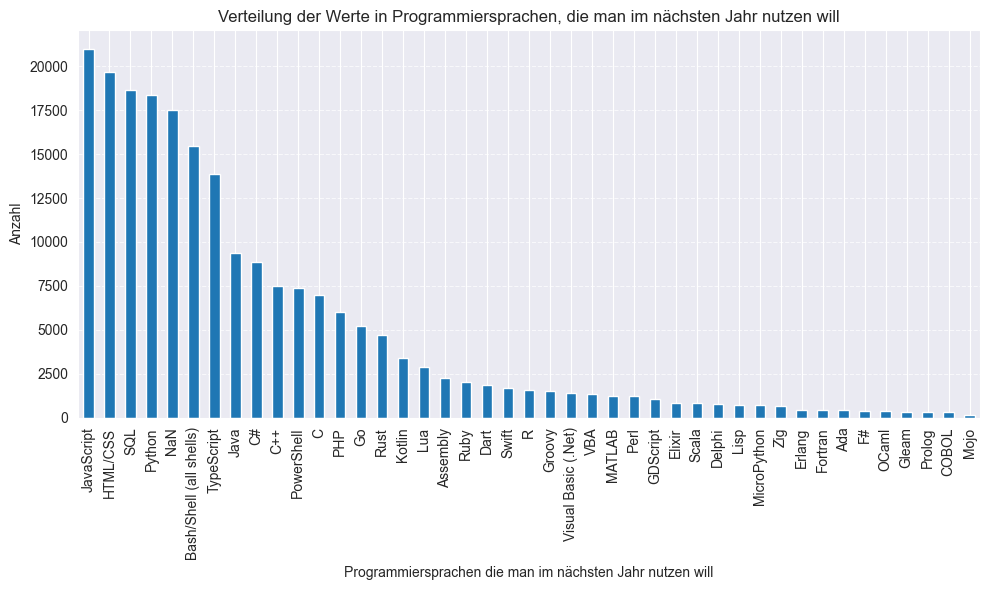

In [23]:
df_lang = df["LanguageHaveWorkedWith"].fillna("NaN").str.split(";")

df_lang_exploded = df_lang.explode()

lang_counts = df_lang_exploded.value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lang_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Programmiersprachen die man im nächsten Jahr nutzen will")
ax.set_ylabel('Anzahl')
ax.set_title(f"Verteilung der Werte in Programmiersprachen, die man im nächsten Jahr nutzen will")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### _Did you work with development environments or AI-enabled code editing tools in the last year or do you plan to in the year to come? Here, we are referring to programs like VSCode that allow you to write, edit and save code easily and help you share code with other developers or AI agents._

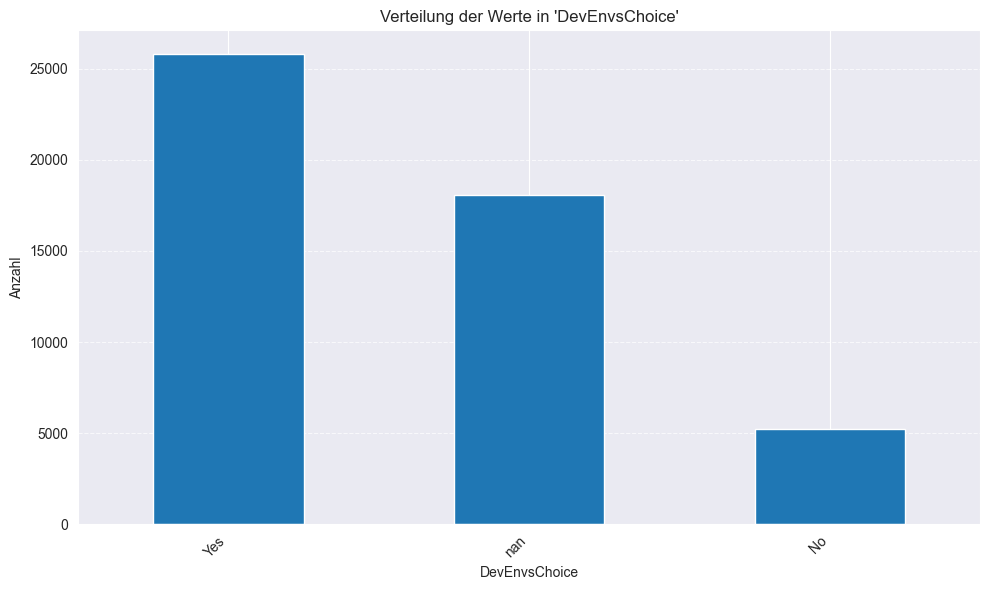

In [24]:
plot_categorical_column(df, "DevEnvsChoice")

#### _Which development environments and AI-enabled code editing tools did you use regularly over the pastyear, and which do you want to work with over the next year? Please check all that apply._

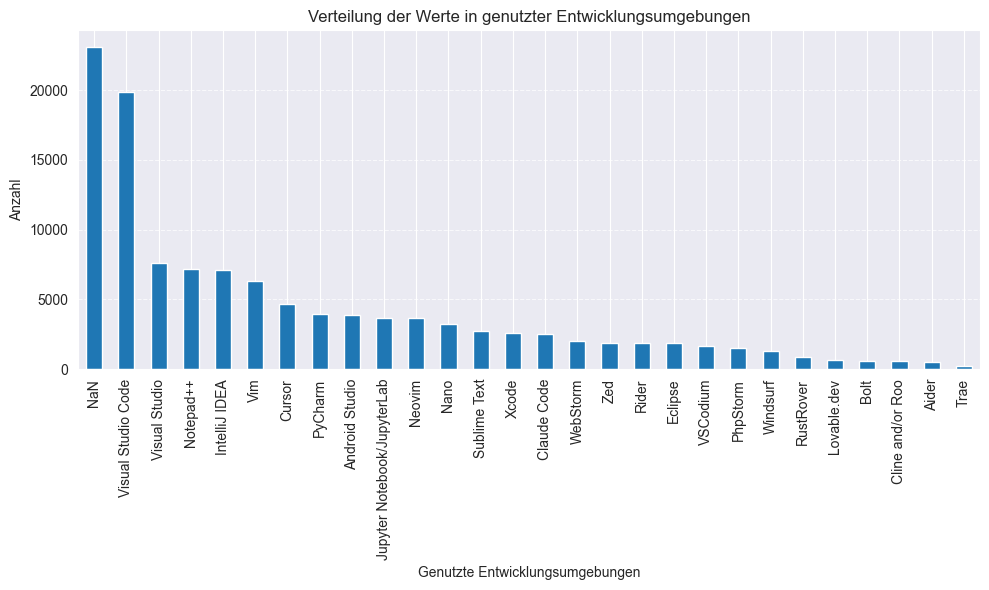

In [25]:
df_lang = df["DevEnvsHaveWorkedWith"].fillna("NaN").str.split(";")

df_lang_exploded = df_lang.explode()

lang_counts = df_lang_exploded.value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lang_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Genutzte Entwicklungsumgebungen")
ax.set_ylabel("Anzahl")
ax.set_title(f"Verteilung der Werte in genutzter Entwicklungsumgebungen")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

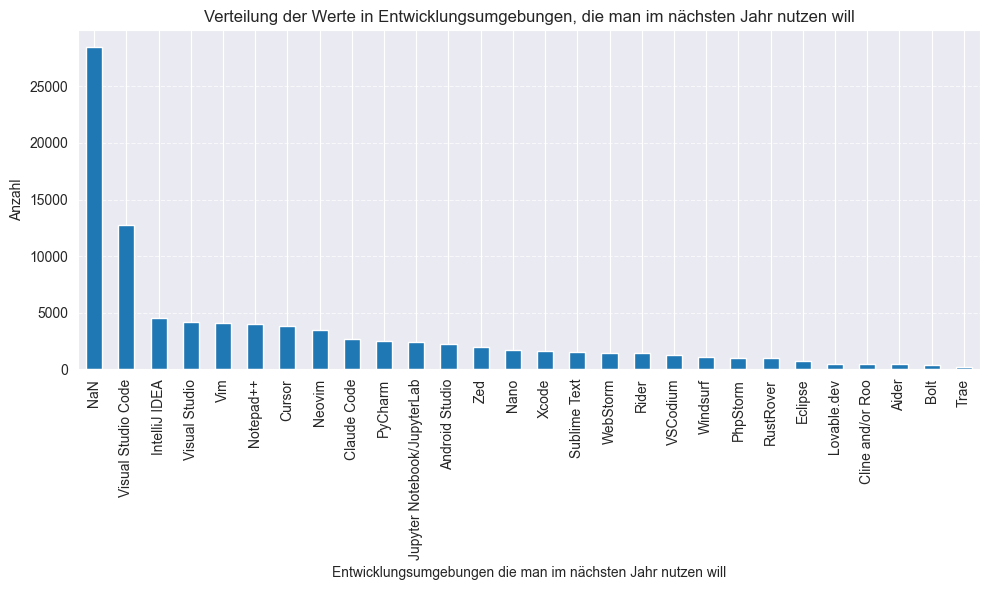

In [26]:
df_lang = df["DevEnvsWantToWorkWith"].fillna("NaN").str.split(";")

df_lang_exploded = df_lang.explode()

lang_counts = df_lang_exploded.value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lang_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Entwicklungsumgebungen die man im nächsten Jahr nutzen will")
ax.set_ylabel('Anzahl')
ax.set_title(f"Verteilung der Werte in Entwicklungsumgebungen, die man im nächsten Jahr nutzen will")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### _What is the primary operating system in which you work?_

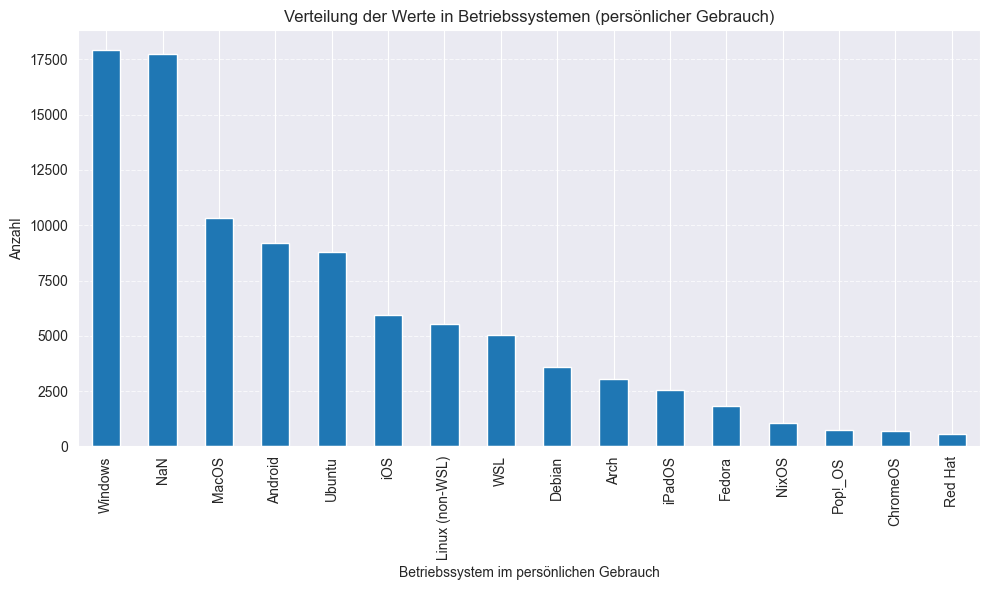

In [27]:
df_lang = (
    df["OpSysPersonal use"]
    .str.replace("Windows Subsystem for Linux (WSL)", "WSL", regex=False)  # Text ersetzen
    .fillna("NaN")                                          # NaN als "NaN" markieren
    .str.split(";")                                         # in Listen aufspalten
)
df_lang_exploded = df_lang.explode()

lang_counts = df_lang_exploded.value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lang_counts.plot(kind="bar", ax=ax)

ax.set_xlabel("Betriebssystem im persönlichen Gebrauch")
ax.set_ylabel("Anzahl")
ax.set_title(f"Verteilung der Werte in Betriebssystemen (persönlicher Gebrauch)")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### _How satisfied are you in your current professional developer role?_

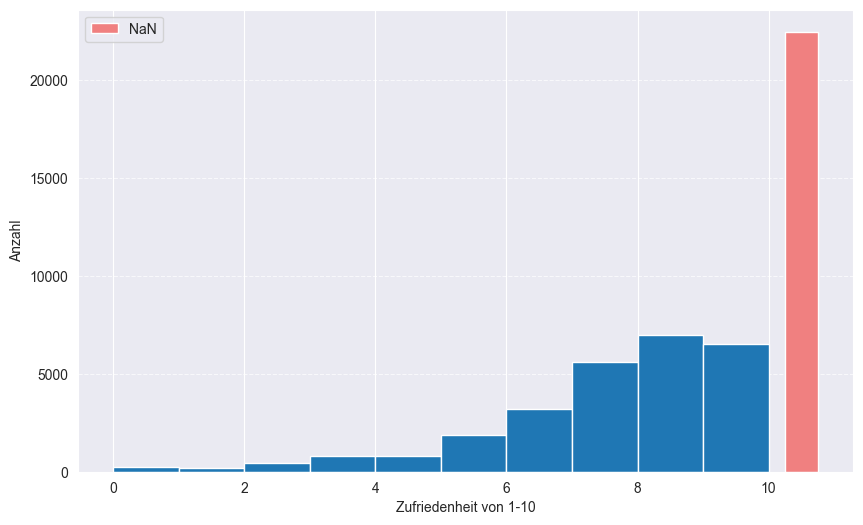

In [28]:
data = df['JobSat'].dropna()

nan_count = df['JobSat'].isna().sum()

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Zufriedenheit von 1-10')
ax.set_ylabel('Anzahl')

if nan_count > 0:
    ax.bar(10.5, nan_count, width=0.5, color='lightcoral', label='NaN')
    ax.legend()
# ax.set_xlim(0, 12)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.hist(data)
plt.show()

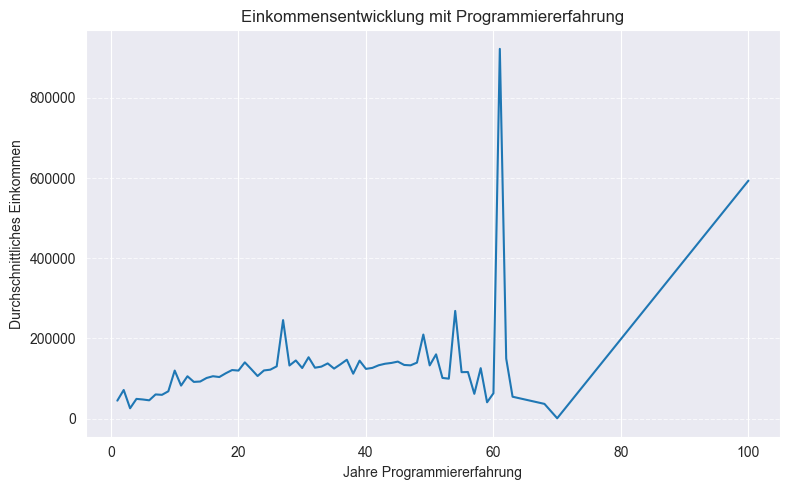

In [29]:
# Nach Erfahrung gruppieren und Durchschnitt berechnen
avg_income = df.groupby("YearsCode")["ConvertedCompYearly"].mean().dropna()

fig, ax = plt.subplots(figsize=(8,5))
avg_income.plot(ax=ax)

ax.set_xlabel("Jahre Programmiererfahrung")
ax.set_ylabel("Durchschnittliches Einkommen")
ax.set_title("Einkommensentwicklung mit Programmiererfahrung")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

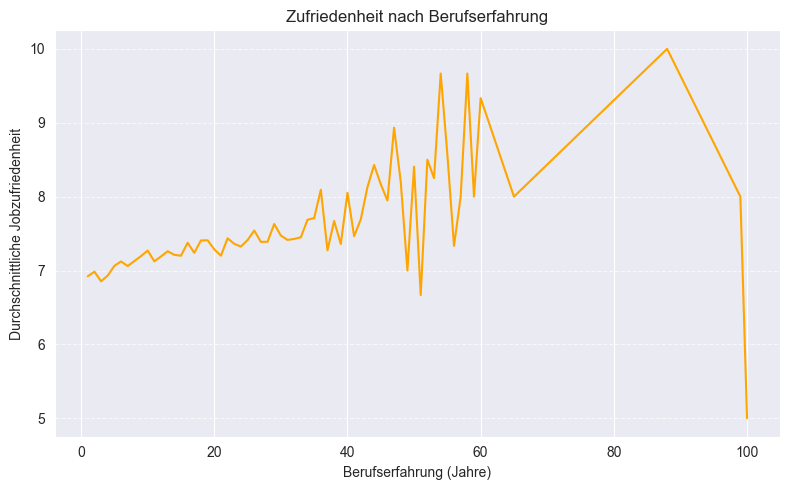

In [30]:
avg_satisfaction = df.groupby("WorkExp")["JobSat"].mean().dropna()

fig, ax = plt.subplots(figsize=(8,5))
avg_satisfaction.plot(ax=ax, color='orange')

ax.set_xlabel("Berufserfahrung (Jahre)")
ax.set_ylabel("Durchschnittliche Jobzufriedenheit")
ax.set_title("Zufriedenheit nach Berufserfahrung")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


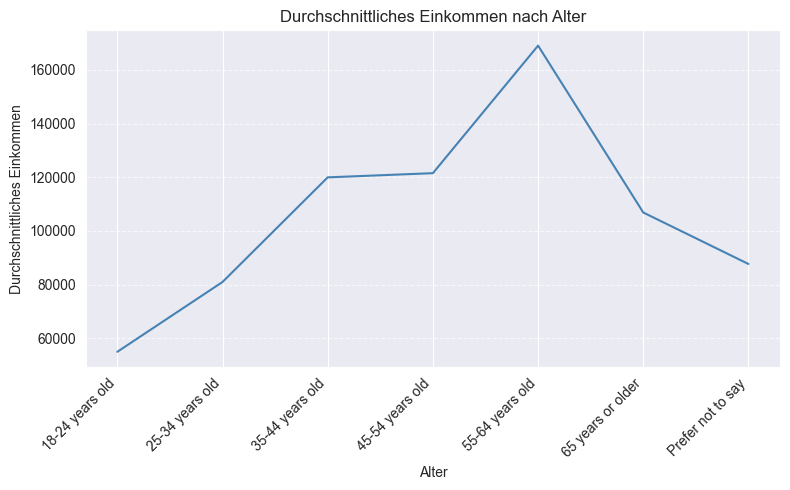

In [31]:
# Alter und Einkommen bereinigen
df_age_income = df[["Age", "ConvertedCompYearly"]].dropna()

# Nach Alter gruppieren und Mittelwert berechnen
avg_income_age = df_age_income.groupby("Age")["ConvertedCompYearly"].mean()

fig, ax = plt.subplots(figsize=(8,5))
avg_income_age.plot(ax=ax, color="steelblue")

ax.set_xlabel("Alter")
ax.set_ylabel("Durchschnittliches Einkommen")
ax.set_title("Durchschnittliches Einkommen nach Alter")
ax.yaxis.grid(True, linestyle="--", alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


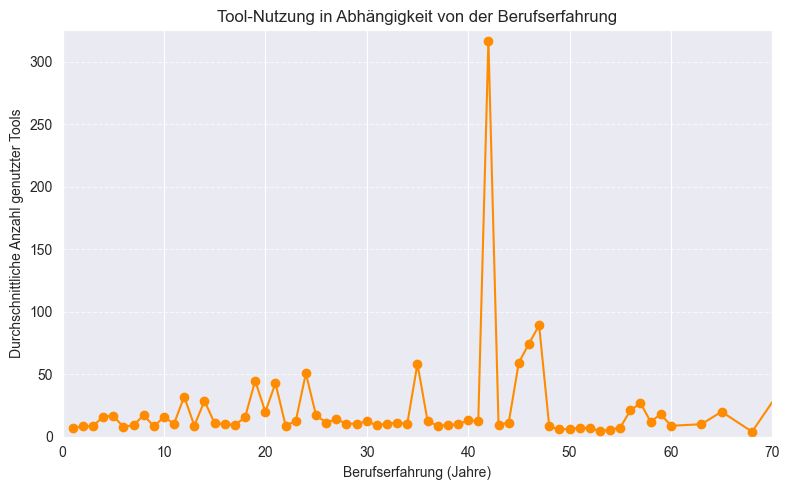

In [32]:
df_tools_exp = df[["WorkExp", "ToolCountWork"]].dropna()
avg_tools_exp = df_tools_exp.groupby("WorkExp")["ToolCountWork"].mean()

fig, ax = plt.subplots(figsize=(8,5))
avg_tools_exp.plot(ax=ax, marker="o", color="darkorange")

ax.set_xlabel("Berufserfahrung (Jahre)")
ax.set_ylabel("Durchschnittliche Anzahl genutzter Tools")
ax.set_title("Tool-Nutzung in Abhängigkeit von der Berufserfahrung")
ax.set_xlim(0, 70)
ax.set_ylim(0,325)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()